# Neste Notebook a ideia é a siguinte:
    1-Dividir textos por Cláusulas
    2-Treinar um Clasificador de textos SVC
    3-Verificar matriz de confução.

In [85]:
import pickle
import pandas as pd
import re
from utils import *

In [86]:
'''carrega o arquivo pickle que contém todos os textos de cada documento,
 divide-os por cláusulas e coloca cada seção do documento com sua respectiva 
 cláusula dentro de um dataframe.'''

all_docs = pd.read_pickle('docs_df.pkl')
df2=pd.DataFrame({'textos':0,'clausulas':0},index=[])
for t in all_docs['texto']:
    pattern = re.compile('CLÁUSULA\s.*\n[\w\s]+?\n\n')
    matches = re.findall(pattern,t)
    matches.insert(0,'titulo')
    indices = []
    for texto in matches:
        texto = re.sub('\n', ' ',texto)
        indices.append(texto)
    #print(texto)
    df1 = pd.DataFrame({'textos':t.split('CLÁUSULA'), 'clausulas':indices})
    df2 = df2.append(df1,ignore_index=True)
df2.head(5)

,textos,clausulas
0,INSTRUMENTO PARTICULAR DE ESCRITURA DA 1ª (PRI...,titulo
1,I\nAUTORIZAÇÕES\n\nAutorização da Emissão e d...,CLÁUSULA I AUTORIZAÇÕES
2,II\nREQUISITOS\n\nA presente 1ª (primeira) em...,CLÁUSULA II REQUISITOS
3,III\nOBJETO SOCIAL DA EMISSORA E CARACTERÍSTI...,CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARAC...
4,IV\nCARACTERÍSTICAS DAS DEBÊNTURES\n\nCaracte...,CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES


In [87]:
df2.iloc[3]['clausulas']

'CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARACTERÍSTICAS DA EMISSÃO  '

In [88]:
#par_clausula_1

In [89]:
# para_texts = []
# for texts in par_clausula_1['textos']:
    
#     para = texts.split('\n')
#     #print(para)
#     for p in para:
#         #print(p)
#         if len(p) == 0:
#             continue
#         para_texts.append(p)

df2

In [90]:
#len(para_text)

In [91]:
# df_cla1 = pd.DataFrame(para_texts,columns=['Paragrafos'])
# df_cla1
# df_cla1['CLÁUSULA'] = 'CLÁUSULA I AUTORIZAÇÕES'
# df_cla1

In [92]:
# par_clausula_2 = df2[df2['clausulas']=='''CLÁUSULA II REQUISITOS  ''']
# for texts in par_clausula_2['textos']:
#     para_texts = []
#     para = texts.split('\n')
#     #print(para)
#     for p in para:
#         #print(p)
#         if len(p) == 0:
#             continue
#         para_texts.append(p)
# df_cla2 = pd.DataFrame(para_texts,columns=['Paragrafos'])
# df_cla2
# df_cla2['CLÁUSULA'] = 'CLÁUSULA II REQUISITOS'
# df_cla2

In [93]:
# par_clausula_3 = df2[df2['clausulas']=='''CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARACTERÍSTICAS DA EMISSÃO  ''']
# for texts in par_clausula_3['textos']:
#     para_texts = []
#     para = texts.split('\n')
#     #print(para)
#     for p in para:
#         #print(p)
#         if len(p) == 0:
#             continue
#         para_texts.append(p)
# df_cla3 = pd.DataFrame(para_texts,columns=['Paragrafos'])
# df_cla3['CLÁUSULA'] = 'CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARACTERÍSTICAS DA EMISSÃO'
# df_cla3

In [94]:
# par_clausula_4 = df2[df2['clausulas']=='''CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES  ''']
# para_texts = []
# for texts in par_clausula_4['textos']:
    
#     para = texts.split('\n')
#     #print(para)
#     for p in para:
#         #print(p)
#         if len(p) == 0:
#             continue
#         para_texts.append(p)
# df_cla4 = pd.DataFrame(para_texts,columns=['Paragrafos'])
# df_cla4['CLÁUSULA'] = 'CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES'
# df_cla4

In [95]:
def separar_parrafos_de_clausulas(df2):
    Data_Clausulas = pd.DataFrame({'PARAGRAFOS':0,'CLÁUSULA':0},index=[])
    for index in df2.index:
        para_texts = []
        df = pd.DataFrame(df2.iloc[index]).transpose()
        for texts in df['textos']:
            para = texts.split('\n')
            #print(para)
            for p in para:
                #print(p)
                if len(p) == 0:
                    continue
                para_texts.append(p)
        df_cla = pd.DataFrame(para_texts,columns=['PARAGRAFOS'])
        df_cla
        #print(df.clausulas.to_list()[0])
        df_cla['CLÁUSULA'] = df.clausulas.to_list()[0]
        Data_Clausulas = Data_Clausulas.append(df_cla)
    return Data_Clausulas



In [96]:
Data_Clausulas = pd.DataFrame({'PARAGRAFOS':0,'CLÁUSULA':0},index=[])
for index in df2.index:
    para_texts = []
    df = pd.DataFrame(df2.iloc[index]).transpose()
    for texts in df['textos']:
        para = texts.split('\n')
        #print(para)
        for p in para:
            #print(p)
            if len(p) == 0:
                continue
            para_texts.append(p)
    df_cla = pd.DataFrame(para_texts,columns=['PARAGRAFOS'])
    df_cla
    #print(df.clausulas.to_list()[0])
    df_cla['CLÁUSULA'] = df.clausulas.to_list()[0]
    Data_Clausulas = Data_Clausulas.append(df_cla)

Data_Clausulas.to_pickle('Data_Clausulas_por_paragrafos.pkl')
Data_Clausulas

,PARAGRAFOS,CLÁUSULA
0,INSTRUMENTO PARTICULAR DE ESCRITURA DA 1ª (PRI...,titulo
1,"Pelo presente instrumento,",titulo
2,"TIBAGI ENERGIA SPE S.A., sociedade por ações d...",titulo
3,OLIVEIRA TRUST DISTRIBUIDORA DE TÍTULOS E VALO...,titulo
4,sendo a Emissora e o Agente Fiduciário designa...,titulo
...,...,...
117,[Condições de Conclusão do Projeto previstas n...,CLÁUSULA X DISPOSIÇÕES GERAIS
118,(iii) a ciência dos devedores dos direitos ced...,CLÁUSULA X DISPOSIÇÕES GERAIS
119,"A Emissora vem, assim, por meio da presente, s...",CLÁUSULA X DISPOSIÇÕES GERAIS
120,"Atenciosamente,",CLÁUSULA X DISPOSIÇÕES GERAIS


In [97]:
df

,textos,clausulas
54,X\nDISPOSIÇÕES GERAIS\n\nComunicações\n\nQuai...,CLÁUSULA X DISPOSIÇÕES GERAIS


# Criação de modelo

In [98]:

from sklearn.model_selection import train_test_split

In [99]:
# Carregando os dados para treinar o modelo
X = Data_Clausulas['PARAGRAFOS']
y = Data_Clausulas['CLÁUSULA']

In [100]:
# eparação dos datos de trinamento e predição
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=55)
X_test

3      Quaisquer notificações, instruções ou comunica...
5      nesta data os representantes legais que assina...
48     Na Assembleia Geral de Debenturistas mencionad...
86                                                 CNPJ:
80     METODOLOGIA PARA CÁLCULO DO ÍNDICE DE COBERTUR...
                             ...                        
6      As Assembleias Gerais de Debenturistas podem s...
8      As Assembleias Gerais de Debenturistas deverão...
134    Observados os termos da Cláusula 4.16.2 acima,...
41     fiscalizar o cumprimento das cláusulas e itens...
3      Observadas as demais obrigações previstas nest...
Name: PARAGRAFOS, Length: 1179, dtype: object

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [102]:
# Criando Pipline para ajustar modelo
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [103]:
#ajuste/fit do modelo
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [104]:
# realizando predições
predictions = text_clf.predict(X_test)


In [105]:
#Confusion Matrix...
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [106]:
print(confusion_matrix(y_test,predictions))

[[ 12   0   0   0   0   0   0   0   0   2   0]
 [  0  52   0   5   0   0   0   0   0   0   0]
 [  0   0  50   0   0   0   0   0   0   0   0]
 [  0   0   0 284   0   1   0   0   0   5   0]
 [  0   0   0   0  73   0   0   0   0   0   0]
 [  0   0   0   0   0  96   0   0   0   3   0]
 [  0   0   0   0   0   0 117   0   0   0   0]
 [  0   0   0   0   4   0   0 158   0   5   0]
 [  0   0   0   0   0   0   0   0  36   0   0]
 [  0   1   4   1   0   1   0   3   2 252   0]
 [  0   0   0   0   0   0   0   0   0   1  11]]


In [107]:
print(classification_report(y_test,predictions))

                                                                       precision    recall  f1-score   support

                                            CLÁUSULA I AUTORIZAÇÕES         1.00      0.86      0.92        14
                                             CLÁUSULA II REQUISITOS         0.98      0.91      0.95        57
CLÁUSULA III OBJETO SOCIAL DA EMISSORA E CARACTERÍSTICAS DA EMISSÃO         0.93      1.00      0.96        50
                         CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES         0.98      0.98      0.98       290
                    CLÁUSULA IX DECLARAÇÕES E GARANTIAS DA EMISSORA         0.95      1.00      0.97        73
                                   CLÁUSULA V VENCIMENTO ANTECIPADO         0.98      0.97      0.97        99
                      CLÁUSULA VI OBRIGAÇÕES ADICIONAIS DA EMISSORA         1.00      1.00      1.00       117
                                     CLÁUSULA VII AGENTE FIDUCIÁRIO         0.98      0.95      0.96       167


In [108]:
text_clf.predict(['INSTRUMENTO PARTICULAR DE ESCRITURA DA 1ª (PRIMEIRA) EMISSÃO DE DEBÊNTURES SIMPLES, NÃO CONVERSÍVEIS EM AÇÕES, DA ESPÉCIE COM GARANTIA REAL, COM GARANTIA ADICIONAL FIDEJUSSÓRIA, EM SÉRIE ÚNICA, PARA DISTRIBUIÇÃO PÚBLICA COM ESFORÇOS RESTRITOS, DA TIBAGI ENERGIA SPE S.A. \n\nPelo presente instrumento,\n\nTIBAGI ENERGIA SPE S.A., sociedade por ações de capital fechado, com sede na Cidade de Belo Horizonte, Estado de Minas Gerais, na Avenida Getúlio Vargas, nº 874, 10º andar, Sala 1006, inscrita no Cadastro Nacional de Pessoa Jurídica do Ministério da Economia (“CNPJ”) sob o nº 23.080.281/0001-35 e na Junta Comercial do Estado de Minas Gerais (“JUCEMG”) sob o NIRE nº [•], neste ato representada por seu(s) representante(s) legal(is) devidamente autorizado(s) e identificado(s) nas páginas de assinaturas do presente instrumento (“Emissora” ou “Companhia”); e\n\nOLIVEIRA TRUST DTVM S.A., instituição financeira autorizada a exercer as funções de agente fiduciário, com sede na Cidade e Estado do Rio de Janeiro, na Avenida das Américas, nº 3434, Bloco 7 - , inscrita no CNPJ sob o nº 36.113.876/0001-91, neste ato representada por seu(s) representante(s) legal(is) devidamente autorizado(s) e identificado(s) nas páginas de assinaturas do presente instrumento (“Agente Fiduciário”), representando a comunhão dos titulares das debêntures desta emissão\xa0(“Debenturistas” e, individua'])

array(['titulo'], dtype=object)

In [120]:
text_clf.predict(['''na qual foram deliberadas: (a) a aprovação da Emissão e da
Oferta Restrita (conforme definido abaixo), bem como de seus termos e condições; (b) a
outorga da Cessão Fiduciária do CDB, da Alienação Fiduciária de Ações, do Penhor de
Ações e da Cessão Fiduciária de Conta em favor dos Debenturistas, conforme, Cláusula
3.6.1 abaixo; e (c) a autorização à Diretoria e demais representantes legais da Companhia
para adotar todas e quaisquer medidas e celebrar todos os documentos necessários à
Emissão, podendo, inclusive, celebrar aditament
  '''])

array(['CLÁUSULA I AUTORIZAÇÕES  '], dtype=object)

In [110]:
text_clf.predict(['''alienação fiduciária, pelas Acionistas da totalidade das ações representativas do capital social da Emissora, que venham a ser subscritas ou de qualquer forma adquiridas por qualquer das Acionistas, seja na forma dos artigos 166, 167, 169 e 170 da Lei das Sociedades por Ações, seja por força de desmembramentos ou grupamentos das ações, seja por consolidação, fusão, permuta de ações, divisão de ações, reorganização societária ou sob qualquer outra forma, quer substituam ou não as ações originalmente alienadas, abrangendo também (a) todos os frutos, lucros, rendimentos, bonificações, distribuições e demais direitos, inclusive dividendos, reduções de capital e juros sobre o capital próprio, em dinheiro ou mediante distribuição de novas ações que venham a ser apurados, declarados e ainda não pagos, creditados ou pagos pela Emissora, bem como debêntures conversíveis, partes beneficiárias ou outros valores mobiliários conversíveis em ações, além de direitos de preferência e opções, que venham a ser por elas subscritos ou adquiridos até a liquidação das obrigações garantidas; (b) todos os valores e bens recebidos ou, de qualquer outra forma, distribuídos à Emissora a título de qualquer cobrança, permuta, venda ou qualquer outra forma de disposição de qualquer das ações, de quaisquer bens ou títulos nos quais as ações tenham sido convertidas e de quaisquer outros bens ou títulos sujeitos à alienação fiduciária ora referida, incluindo qualquer depósito, valor mobiliário ou título negociável; e (c) todos os títulos, valores mobiliários, respectivos rendimentos e quaisquer outros bens ou direitos eventualmente adquiridos pela Emissora com o produto da realização dos bens objeto da garantia mencionada nos itens (a) e (b) acima, tudo nos termos previstos em contrato de alienação fiduciária de ações a'''])

array(['CLÁUSULA IV CARACTERÍSTICAS DAS DEBÊNTURES  '], dtype=object)

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


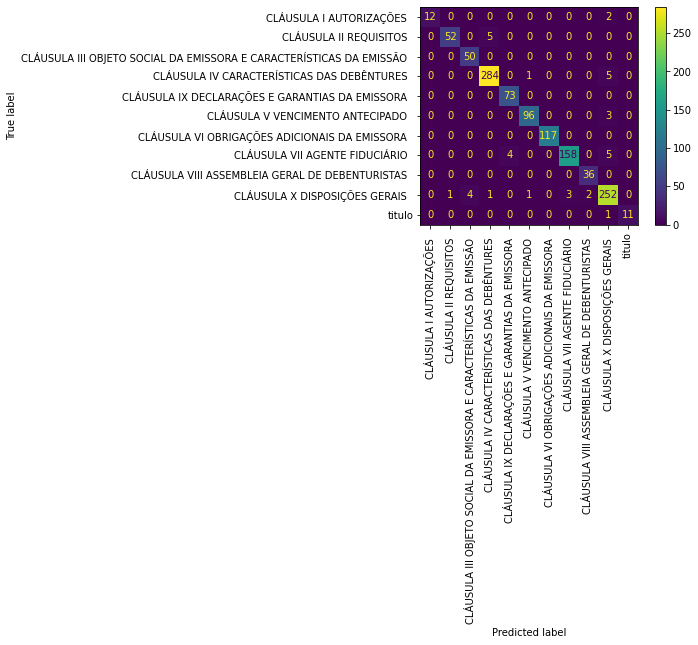

In [112]:
plot_confusion_matrix(text_clf, X_test, y_test)  
plt.xticks(rotation=90)
plt.show()

In [113]:
import PyPDF2

In [121]:
pdfFileObj = open('AEGE_5_Escritura - Escritura_20210602_000.pdf', 'rb')

In [122]:
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [123]:
print(pdfReader.numPages)

70


In [124]:
for i in range (pdfReader.numPages):    
    pageObj = pdfReader.getPage(i)
    print(pageObj.extractText())
 

Este documento foi assinado digitalmente por Roberta De Sousa Ramos Vettorazzo Marcondes, ANDREIA DE SOUSA RAMOS VETTORAZZO, Felipe Versiani Gandolfo, Jose Carlos Botelho De Moraes Toledo, LUIS VITAL DE SOUZA RAMOS VETTORAZZO, Dalila Cleopath Camargo Botelho De Moraes Toledo, Sergio Luis Botelho De Moraes Toledo, Sergio Luis Botelho De Moraes Toledo, Ricardo Eugenio De Sousa Ramos Vettorazzo, Carlos Cardoso Távora Neto, Rholf Alvarenga Badine, Marcelle Motta Santoro e Leandro Antonio Grisi. Para verificar as assinaturas vá ao site https://www.portaldeassinaturas.com.br:443 e utilize o código 1B0B-F3A5-96C7-17F7.Este documento foi assinado digitalmente por Roberta De Sousa Ramos Vettorazzo Marcondes, ANDREIA DE SOUSA RAMOS VETTORAZZO, Felipe Versiani Gandolfo, Jose Carlos Botelho De Moraes Toledo, LUIS VITAL DE SOUZA RAMOS VETTORAZZO, Dalila Cleopath Camargo Botelho De Moraes Toledo, Sergio Luis Botelho De Moraes Toledo, Sergio Luis Botelho De Moraes Toledo, Ricardo Eugenio De Sousa Ram

In [125]:
pageObj.extractText()

'Tipo: Certificado DigitalRICARDO EUGENIO DE SOUSA RAMOS VETTORAZZO (Signatário) - 184.312.118-22  em 02/06/2021 18:06 UTC-03:00Tipo: Certificado DigitalCarlos Cardoso Távora Neto (Testemunha) - 144.285.747-11  em 02/06/2021 17:40 UTC-03:00Tipo: Certificado DigitalRholf Alvarenda Badine (Signatário) - 345.475.088-10  em 02/06/2021 17:33 UTC-03:00Nome no certificado: Rholf Alvarenga BadineTipo: Certificado DigitalMarcelle Motta Santoro (Signatário) - 109.809.047-06  em 02/06/2021 17:32 UTC-03:00Tipo: Certificado DigitalLEANDRO ANTONIO GRISI (Signatário) - 167.985.998-69  em 02/06/2021 17:23 UTC-03:00Tipo: Certificado Digital'

In [1]:
# from tika import parser

# raw = parser.from_file("AEGE_5_Escritura - Escritura_20210602_000.pdf")
# raw = str(raw)

# safe_text = raw.encode('utf-8', errors='ignore')

# safe_text = str(safe_text).replace("\n", "").replace("\\", "")
# print('--- safe text ---' )
# print( safe_text )

In [14]:
text1 = 'companhias seguradoras e sociedades de capitalização; (iii) entidades abertas e fechadas de previdência complementar; (iv) pessoas naturais ou jurídicas que possuam investimentos financeiros em valor superior a R$ 10.000.000,00 (dez milhões de reais)'
import re
re.search('R\$ 10.000.000,00', text1)

<re.Match object; span=(211, 227), match='R$ 10.000.000,00'>